# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 19)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'price' 'quantity']


In [4]:
pr_gra=[]

for i in project_data['project_grade_category']:
    i=i.replace(' ','_')
    i=i.replace('-','_')
    pr_gra.append(i)
project_data['project_grade_category']=pr_gra

In [5]:
project_data['project_grade_category'][:10]

0    Grades_PreK_2
1       Grades_6_8
2       Grades_6_8
3    Grades_PreK_2
4    Grades_PreK_2
5       Grades_3_5
6       Grades_6_8
7       Grades_3_5
8    Grades_PreK_2
9    Grades_PreK_2
Name: project_grade_category, dtype: object

In [6]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades_PreK_2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,481.04,9
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades_3_5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,17.74,14


In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades_PreK_2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,481.04,9,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades_3_5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,17.74,14,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle..."


In [12]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039


In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:26<00:00, 1868.84it/s]


In [17]:
# after preprocesing


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# similarly you can preprocess the titles also
project_title=project_data['project_title']
import re
preprocessed_title=[]
for i in project_title:
    i=i.replace('\\r',"")
    i=i.replace('\\n',"")
    i=i.replace('\\t',"")
    i=i.replace("'\'","")
    i=i.replace(":","")
    i=i.replace("'","")
    i=i.replace("-","")
    i=i.replace(",","")
    i=i.replace(".","")
    i=i.replace("'""'","")
    clean=re.sub('[^A-Za-z0-9]+'," ",i)
    word = ' '.join(e for e in clean.split() if e not in stopwords)
    preprocessed_title.append(word.lower().strip())

In [19]:
#https://simmonhessner.de/lammitize-whole-sentences-with-python-and-nltks-wordnetlemmatizer/
#lemmatizing the preprocessed_title
from nltk.stem import *
import nltk
from nltk.corpus import wordnet
lemmatizer=WordNetLemmatizer()
def nltk2wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
def lemmatize_sentence(sentence):
    nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))
    wn_tagged=map(lambda x:(x[0],nltk2wn_tag(x[1])),nltk_tagged)
    res_words=[]
    for word,tag in wn_tagged:
        if tag is None:
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word,tag))
    return " ".join(res_words)
from tqdm import tqdm
clean_title=[]
for word in tqdm(preprocessed_title):
    i=lemmatize_sentence(word)
    clean_title.append(i)

100%|██████████| 50000/50000 [00:42<00:00, 1162.85it/s]


In [20]:
num_counter=[]
project_sumry=project_data['project_resource_summary'].str.split()
for i,sent in enumerate(project_sumry):
    for word in sent:
        if word.isdigit():
            num_counter.append(i)
numerical_digit=[]
for sent_i in range(len(project_sumry)):
    if sent_i in num_counter:
        numerical_digit.append(1)
    else:
        numerical_digit.append(0)
print(numerical_digit[4:20])
print(len(numerical_digit))


[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
50000



## 1.5 Preparing data for models

In [21]:
project_data['num_or_not']=numerical_digit
project_data['project_title']=clean_title
project_data['essay']=preprocessed_essays
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'num_or_not'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [22]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'num_or_not'],
      dtype='object')

In [23]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import train_test_split
project_data=project_data[['teacher_prefix', 'school_state', 'project_grade_category', 'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity','project_is_approved','num_or_not']]
project_data=project_data.dropna()
y=project_data['project_is_approved']
x=project_data[['teacher_prefix', 'school_state', 'project_grade_category', 'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity','num_or_not']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_cv.shape)
print(y_cv.shape)
print(x_train.columns)

(24498, 12)
(24498,)
(15000, 12)
(15000,)
(10500, 12)
(10500,)
Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity', 'num_or_not'],
      dtype='object')


In [24]:
x_train['approved_project']=y_train
approved_proj=x_train[x_train['approved_project']==1]
reject_proj=x_train[x_train['approved_project']==0]
reject_proj_upsample=reject_proj.sample(approved_proj.shape[0],replace=True)
print(approved_proj.shape)
print(reject_proj.shape)
print(reject_proj_upsample.shape)

(20752, 13)
(3746, 13)
(20752, 13)


In [25]:
train_data=pd.concat([approved_proj,reject_proj_upsample],axis=0)
y_train=train_data['approved_project']
x_train=train_data.drop(['approved_project'],axis=1)
x_train.shape

(41504, 12)

In [26]:
print(y_train.shape)

(41504,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [27]:
 my_counter=Counter()
for grade in x_train['school_state'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sort_project_grade_cat=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sort_project_grade_cat),lowercase=False, binary=True)
vectorizer.fit(x_train['school_state'])
    # vectorizing 
school_state_one_hot_train = vectorizer.transform(x_train['school_state'])
school_state_one_hot_cv = vectorizer.transform(x_cv['school_state'])
school_state_one_hot_test = vectorizer.transform(x_test['school_state'])


In [28]:
from sklearn.preprocessing import Normalizer

my_counter=Counter()
for grade in x_train['clean_subcategories'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sorted_sub_cat_dict=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()),\
lowercase=False, binary= True) 
vectorizer.fit(x_train['clean_subcategories'].values)

subcategories_one_hot_train=vectorizer.transform(x_train['clean_subcategories'])
subcategories_one_hot_test=vectorizer.transform(x_test['clean_subcategories'])
subcategories_one_hot_cv=vectorizer.transform(x_cv['clean_subcategories'])

In [29]:
my_counter=Counter()
for grade in x_train['project_grade_category'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sorted_sub_cat_dict=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()),\
lowercase=False, binary= True) 
vectorizer.fit(x_train['project_grade_category'].values)

grade_cat_one_hot_train=vectorizer.transform(x_train['project_grade_category'])
grade_cat_one_hot_test=vectorizer.transform(x_test['project_grade_category'])
grade_cat_one_hot_cv=vectorizer.transform(x_cv['project_grade_category'])
grade_feature_name= vectorizer.get_feature_names()

from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
normalizer.fit(x_train['price'].values.reshape(-1,1))
price_one_hot_train = normalizer.transform(x_train['price'].values.reshape(-1,1)) 
price_one_hot_test = normalizer.transform(x_test['price'].values.reshape(-1,1)) 
price_one_hot_cv = normalizer.transform(x_cv['price'].values.reshape(-1,1)) 
normalizer.fit(x_train['quantity'].values.reshape(-1,1))
quantity_one_hot_train=normalizer.transform(x_train['price'].values.reshape(-1,1))
quantity_one_hot_test=normalizer.transform(x_test['price'].values.reshape(-1,1))
quantity_one_hot_cv=normalizer.transform(x_cv['price'].values.reshape(-1,1))

In [30]:
grade_feature_name

['Grades_9_12', 'Grades_6_8', 'Grades_3_5', 'Grades_PreK_2']

In [31]:
my_counter=Counter()
for grade in x_train['teacher_prefix'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sorted_sub_cat_dict=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()),\
lowercase=False, binary= True) 
vectorizer.fit(x_train['teacher_prefix'].values)

teacher_prefix_one_hot_train=vectorizer.transform(x_train['teacher_prefix'])
teacher_prefix_one_hot_test=vectorizer.transform(x_test['teacher_prefix'])
teacher_prefix_one_hot_cv=vectorizer.transform(x_cv['teacher_prefix'])
teacher_prefix_one_hot_cv.shape

(10500, 5)

In [32]:
my_counter=Counter()
for grade in x_train['clean_categories'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sorted_sub_cat_dict=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()),\
lowercase=False, binary= True) 
vectorizer.fit(x_train['clean_categories'].values)

categories_one_hot_train=vectorizer.transform(x_train['clean_categories'].values)
categories_one_hot_test=vectorizer.transform(x_test['clean_categories'].values)
categories_one_hot_cv=vectorizer.transform(x_cv['clean_categories'].values)
categories_feature_name=vectorizer.get_feature_names()

In [33]:
print(school_state_one_hot_cv.shape)
print(school_state_one_hot_train.shape)
print(school_state_one_hot_test.shape)
print(quantity_one_hot_cv.shape)
print(quantity_one_hot_train.shape)
print(quantity_one_hot_test.shape)

print(price_one_hot_cv.shape)
print(price_one_hot_train.shape)
print(price_one_hot_test.shape)

print(subcategories_one_hot_cv.shape)
print(subcategories_one_hot_train.shape)
print(subcategories_one_hot_test.shape)
print(categories_one_hot_cv.shape)
print(categories_one_hot_train.shape)
print(categories_one_hot_test.shape)
print(grade_cat_one_hot_cv.shape)
print(grade_cat_one_hot_train.shape)
print(grade_cat_one_hot_test.shape)
print(teacher_prefix_one_hot_cv.shape)
print(teacher_prefix_one_hot_train.shape)
print(teacher_prefix_one_hot_test.shape)

(10500, 51)
(41504, 51)
(15000, 51)
(10500, 1)
(41504, 1)
(15000, 1)
(10500, 1)
(41504, 1)
(15000, 1)
(10500, 30)
(41504, 30)
(15000, 30)
(10500, 9)
(41504, 9)
(15000, 9)
(10500, 4)
(41504, 4)
(15000, 4)
(10500, 5)
(41504, 5)
(15000, 5)


In [34]:
num_or_not_train=x_train['num_or_not'].values.reshape(-1,1)
num_or_not_test=x_test['num_or_not'].values.reshape(-1,1)
num_or_not_cv=x_cv['num_or_not'].values.reshape(-1,1)
num_or_not_train.shape

(41504, 1)

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [35]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10)
def bow(data): 
    text_bow = vectorizer.transform(data)
    return text_bow
vectorizer.fit(x_train['essay'])
bow_train_essay=bow(x_train['essay'])
bow_test_essay=bow(x_test['essay'])
bow_cv_essay=bow(x_cv['essay'])
#bow of v
vectorizer.fit(x_train['project_title'])
bow_train_title=bow(x_train['project_title'])
bow_test_title=bow(x_test['project_title'])
bow_cv_title=bow(x_cv['project_title'])


In [36]:
print(bow_cv_title.shape)
print(bow_train_title.shape)
print(bow_test_title.shape)
print(bow_cv_essay.shape)
print(bow_train_essay.shape)
print(bow_test_essay.shape)

(10500, 1759)
(41504, 1759)
(15000, 1759)
(10500, 11571)
(41504, 11571)
(15000, 11571)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['essay'])
tfidf_train_essay = vectorizer.transform(x_train['essay'])
tfidf_test_essay = vectorizer.transform(x_test['essay'])
tfidf_cv_essay = vectorizer.transform(x_cv['essay'])
print(tfidf_train_essay.shape)
print(tfidf_test_essay.shape)
print(tfidf_cv_essay.shape)

(41504, 11571)
(15000, 11571)
(10500, 11571)


In [38]:
vectorizer.fit(x_train['project_title'])
tfidf_train_title = vectorizer.transform(x_train['project_title'])
tfidf_test_title = vectorizer.transform(x_test['project_title'])
tfidf_cv_title = vectorizer.transform(x_cv['project_title'])
print(tfidf_train_title.shape)
print(tfidf_test_title.shape)
print(tfidf_cv_title.shape)

(41504, 1759)
(15000, 1759)
(10500, 1759)


In [39]:
# average Word2Vec
# compute average word2vec for each review.
def avg_w2v(data):
    with open('glove_vectors', 'rb') as f:
        model = pickle.load(f)
        glove_words =  set(model.keys())
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in data: # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors



# average Word2Vec
# compute average word2vec for each review
def tfidf_weighted_w2v(data,tfidf_words):
    with open('glove_vectors', 'rb') as f:
        model = pickle.load(f)
        glove_words =  set(model.keys())
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in data: # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors

In [40]:
avgw2v_train_essay=avg_w2v(x_train['essay'])
avgw2v_test_essay=avg_w2v(x_test['essay'])
avgw2v_cv_essay=avg_w2v(x_cv['essay'])
avgw2v_train_title=avg_w2v(x_train['project_title'])
avgw2v_test_title=avg_w2v(x_test['project_title'])
avgw2v_cv_title=avg_w2v(x_cv['project_title'])


tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'])# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
wtw2v_train_essay=tfidf_weighted_w2v(x_train['essay'],tfidf_words)
wtw2v_test_essay=tfidf_weighted_w2v(x_test['essay'],tfidf_words)
wtw2v_cv_essay=tfidf_weighted_w2v(x_cv['essay'],tfidf_words)


tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['project_title'])# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
wtw2v_train_title=tfidf_weighted_w2v(x_train['project_title'],tfidf_words)
wtw2v_test_title=tfidf_weighted_w2v(x_test['project_title'],tfidf_words)
wtw2v_cv_title=tfidf_weighted_w2v(x_cv['project_title'],tfidf_words)

In [41]:
from scipy.sparse import hstack


In [42]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [43]:
# Please write all the code with proper documentation
train_bow=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,num_or_not_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
quantity_one_hot_train,bow_train_essay,bow_train_title)).tocsr()
cv_bow=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,num_or_not_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
quantity_one_hot_cv,bow_cv_essay,bow_cv_title)).tocsr()
test_bow=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,num_or_not_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
quantity_one_hot_test,bow_test_essay,bow_test_title)).tocsr()

print(train_bow.shape)
print(test_bow.shape)
print(cv_bow.shape)
print(y_train.shape)

(41504, 13432)
(15000, 13432)
(10500, 13432)
(41504,)


In [44]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(6000)
train_new=svd.fit(train_bow)

Text(0,0.5,'dimension')

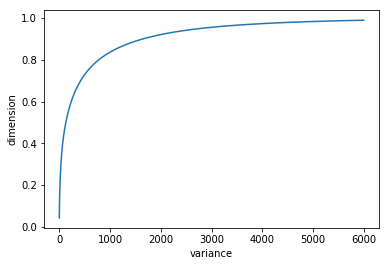

In [66]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('variance')
plt.ylabel('dimension')

In [45]:
train_new_bow=svd.transform(train_bow)
cv_new_bow=svd.transform(cv_bow)
test_new_bow=svd.transform(test_bow)

In [46]:
print(train_new_bow.shape)
print(cv_new_bow.shape)

(41504, 6000)
(10500, 6000)


In [63]:
train_auc=[]
cv_auc=[]
from tqdm import tqdm
k=[1,5,11,19,25,31,39,41,49,51,59,61,71,81,91,99]
for k in tqdm(k):
    model=KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    model.fit(train_new_bow,y_train)
    y_train_prob=[]
    for i in range(0,train_new_bow.shape[0],1000):
        y_train_prob.extend(model.predict_proba(train_new_bow[i:i+1000])[:,1])
    y_cv_prob=[]
    for i in range(0,cv_new_bow.shape[0],1000):
        y_cv_prob.extend(model.predict_proba(cv_new_bow[i:i+1000])[:,1])
    train_auc.append(roc_auc_score(y_train,y_train_prob))
    cv_auc.append(roc_auc_score(y_cv,y_cv_prob))



  0%|          | 0/16 [00:00<?, ?it/s]

  6%|▋         | 1/16 [11:27<2:51:52, 687.49s/it]

 12%|█▎        | 2/16 [23:49<2:44:13, 703.84s/it]

 19%|█▉        | 3/16 [35:44<2:33:12, 707.08s/it]

 25%|██▌       | 4/16 [45:51<2:15:24, 677.07s/it]

 31%|███▏      | 5/16 [55:53<2:00:02, 654.73s/it]

 38%|███▊      | 6/16 [1:05:56<1:46:31, 639.16s/it]

 44%|████▍     | 7/16 [1:17:20<1:37:53, 652.65s/it]

 50%|█████     | 8/16 [1:29:00<1:28:53, 666.69s/it]

 56%|█████▋    | 9/16 [1:40:47<1:19:12, 678.91s/it]

 62%|██████▎   | 10/16 [1:52:32<1:08:40, 686.72s/it]

 69%|██████▉   | 11/16 [2:04:13<57:34, 690.85s/it]  

 75%|███████▌  | 12/16 [2:14:56<45:06, 676.67s/it]

 81%|████████▏ | 13/16 [2:25:18<33:00, 660.14s/it]

 88%|████████▊ | 14/16 [2:35:37<21:35, 647.86s/it]

 94%|█████████▍| 15/16 [2:46:03<10:41, 641.21s/it]

100%|██████████| 16/16 [2:56:28<00:00, 636.34s/it]



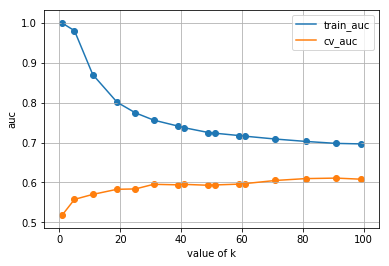

In [64]:
k=[1,5,11,19,25,31,39,41,49,51,59,61,71,81,91,99]
plt.plot(k,train_auc,label='train_auc')
plt.plot(k,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(k,train_auc)
plt.scatter(k,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of k')
plt.show()


In [47]:
from sklearn.metrics import roc_curve,auc
bestK=71
clf=KNeighborsClassifier(n_neighbors=bestK)
clf.fit(train_new_bow,y_train)
y_train_pred=[]
for i in tqdm(range(0,train_new_bow.shape[0],1000)):
    y_train_pred.extend(clf.predict_proba(train_new_bow[i:i+1000])[:,1])
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_pred)
y_test_pred=[]
for i in tqdm(range(0,test_new_bow.shape[0],1000)):
    y_test_pred.extend(clf.predict_proba(test_new_bow[i:i+1000])[:,1])
fpr_test,tpr_test,thresholds_test=roc_curve(y_test,y_test_pred)

100%|██████████| 15/15 [2:09:43<00:00, 497.65s/it] 


Text(0,0.5,'True positive rate')

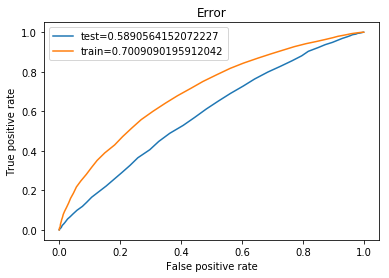

In [48]:
plt.title('Error')
plt.plot(fpr_test,tpr_test,label='test='+str(auc(fpr_test,tpr_test)))
plt.plot(fpr_train,tpr_train,label='train='+str(auc(fpr_train,tpr_train)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


In [49]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train Confusion Matrix
the maximum value of tpr*(1-fpr) 0.4176784346505101 for threshold 0.479
[[13514  7238]
 [ 7442 13310]]
the maximum value of tpr*(1-fpr) 0.4176784346505101 for threshold 0.479


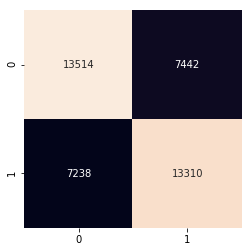

In [50]:
# Please write all the code with proper documentation
print('Train Confusion Matrix')
print(confusion_matrix(y_train,predict(y_train_pred,thresholds_train,fpr_train,tpr_train)))
tn,fp,fn,tp=confusion_matrix(y_train,predict(y_train_pred,thresholds_train,fpr_train,tpr_train)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True,fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

Test Confusion Matrix
the maximum value of tpr*(1-fpr) 0.4176784346505101 for threshold 0.479
[[1199 1121]
 [4921 7759]]
the maximum value of tpr*(1-fpr) 0.4176784346505101 for threshold 0.479


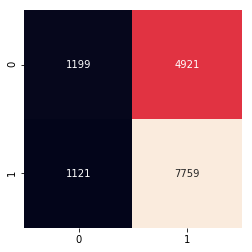

In [51]:
print('Test Confusion Matrix')
print(confusion_matrix(y_test,predict(y_test_pred,thresholds_train,fpr_train,tpr_train)))
tn,fp,fn,tp=confusion_matrix(y_test,predict(y_test_pred,thresholds_train,fpr_train,tpr_train)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [52]:
# Please write all the code with proper documentation
train_tfidf=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,num_or_not_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
quantity_one_hot_train,tfidf_train_essay,tfidf_train_title)).tocsr()
cv_tfidf=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,num_or_not_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
quantity_one_hot_cv,tfidf_cv_essay,tfidf_cv_title)).tocsr()
test_tfidf=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,num_or_not_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
quantity_one_hot_test,tfidf_test_essay,tfidf_test_title)).tocsr()
print(test_tfidf.shape)

print(train_tfidf.shape)
print(cv_tfidf.shape)


(15000, 13432)
(41504, 13432)
(10500, 13432)


Text(0,0.5,'variance')

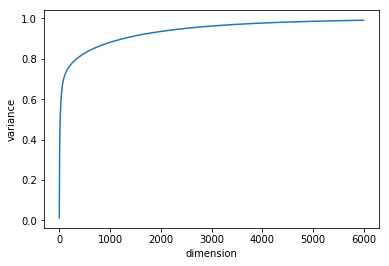

In [53]:
from sklearn.decomposition import TruncatedSVD
reducing_d=TruncatedSVD(6000)
reducing_d.fit(train_tfidf)
plt.plot(np.cumsum(reducing_d.explained_variance_ratio_))
plt.xlabel('dimension')
plt.ylabel('variance')

In [54]:
train_new=reducing_d.transform(train_tfidf)
cv_new=reducing_d.transform(cv_tfidf)
test_new=reducing_d.transform(test_tfidf)
print(train_new.shape)
print(cv_new.shape)
print(test_new.shape)

(41504, 6000)
(10500, 6000)
(15000, 6000)


In [39]:
train_auc=[]
cv_auc=[]
from tqdm import tqdm
K=[19,31,45,49,53,71,81,91]
for k in tqdm(K):
    model=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    model.fit(train_new,y_train)
    y_train_prob=[]
    for i in range(0,train_new.shape[0],1000):
        y_train_prob.extend(model.predict_proba(train_new[i:i+1000])[:,1])
    y_cv_prob=[]
    for i in range(0,cv_new.shape[0],1000):
        y_cv_prob.extend(model.predict_proba(cv_new[i:i+1000])[:,1])
    train_auc.append(roc_auc_score(y_train,y_train_prob))
    cv_auc.append(roc_auc_score(y_cv,y_cv_prob))

100%|██████████| 8/8 [53:19<00:00, 399.29s/it]


In [42]:
K=[95,99]
for k in tqdm(K):
    model=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    model.fit(train_new,y_train)
    y_train_prob=[]
    for i in range(0,train_new.shape[0],1000):
        y_train_prob.extend(model.predict_proba(train_new[i:i+1000])[:,1])
    y_cv_prob=[]
    for i in range(0,cv_new.shape[0],1000):
        y_cv_prob.extend(model.predict_proba(cv_new[i:i+1000])[:,1])
    train_auc.append(roc_auc_score(y_train,y_train_prob))
    cv_auc.append(roc_auc_score(y_cv,y_cv_prob))

100%|██████████| 2/2 [14:15<00:00, 410.10s/it]


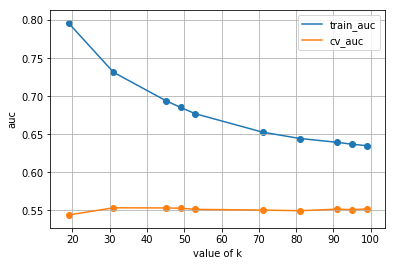

In [43]:
k=[19,31,45,49,53,71,81,91,95,99]
plt.plot(k,train_auc,label='train_auc')
plt.plot(k,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(k,train_auc)
plt.scatter(k,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of k')
plt.show()


In [55]:
bestK=91
clf=KNeighborsClassifier(n_neighbors=bestK,algorithm='brute')
clf.fit(train_new,y_train)
y_train_pred=[]
for i in range(0,train_new.shape[0],1000):
    y_train_pred.extend(clf.predict_proba(train_new[i:i+1000])[:,1])
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_pred)
y_test_pred=[]
for i in range(0,test_new.shape[0],1000):
    y_test_pred.extend(clf.predict_proba(test_new[i:i+1000])[:,1])
fpr_test,tpr_test,thresholds_test=roc_curve(y_test,y_test_pred)

Text(0,0.5,'True positive rate')

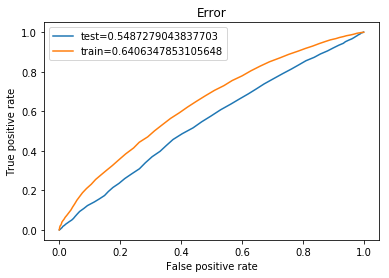

In [56]:
plt.title('Error')
plt.plot(fpr_test,tpr_test,label='test='+str(auc(fpr_test,tpr_test)))
plt.plot(fpr_train,tpr_train,label='train='+str(auc(fpr_train,tpr_train)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Train Confusion Matrix
the maximum value of tpr*(1-fpr) 0.35965249041587577 for threshold 0.593
[[12560  8192]
 [ 8448 12304]]
the maximum value of tpr*(1-fpr) 0.35965249041587577 for threshold 0.593


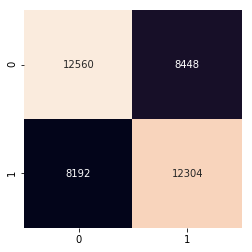

In [57]:
# Please write all the code with proper documentation
print('Train Confusion Matrix')
print(confusion_matrix(y_train,predict(y_train_pred,thresholds_train,fpr_train,tpr_train)))
tn,fp,fn,tp=confusion_matrix(y_train,predict(y_train_pred,thresholds_train,fpr_train,tpr_train)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True,fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

Test Confusion Matrix
the maximum value of tpr*(1-fpr) 0.35965249041587577 for threshold 0.593
[[1164 1156]
 [5376 7304]]
the maximum value of tpr*(1-fpr) 0.35965249041587577 for threshold 0.593


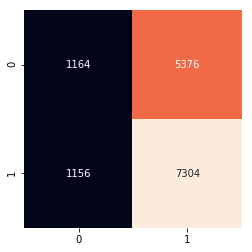

In [58]:
print('Test Confusion Matrix')
print(confusion_matrix(y_test,predict(y_test_pred,thresholds_train,fpr_train,tpr_train)))
tn,fp,fn,tp=confusion_matrix(y_test,predict(y_test_pred,thresholds_train,fpr_train,tpr_train)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [59]:
# Please write all the code with proper documentation
train_avgw2v=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
quantity_one_hot_train,avgw2v_train_essay,avgw2v_train_title)).tocsr()
cv_avgw2v=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
quantity_one_hot_cv,avgw2v_cv_essay,avgw2v_cv_title)).tocsr()
test_avgw2v=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
quantity_one_hot_test,avgw2v_test_essay,avgw2v_test_title)).tocsr()
print(test_avgw2v.shape)
print(train_avgw2v.shape)
print(cv_avgw2v.shape)


(15000, 701)
(41504, 701)
(10500, 701)


Text(0,0.5,'variance')

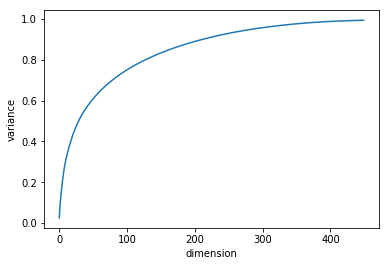

In [60]:
from sklearn.decomposition import TruncatedSVD
reducing_d=TruncatedSVD(450)
reducing_d.fit(train_avgw2v)
plt.plot(np.cumsum(reducing_d.explained_variance_ratio_))
plt.xlabel('dimension')
plt.ylabel('variance')

In [61]:
train_n=reducing_d.fit_transform(train_avgw2v)
cv_n=reducing_d.fit_transform(cv_avgw2v)
test_n = reducing_d.fit_transform(test_avgw2v)

In [74]:
y_train[:10000].shape

(10000,)

In [89]:
train_auc=[]
cv_auc=[]
K=[19,31,45,49,53,71,81,91]
for k in tqdm(K):
    model=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    model.fit(train_n,y_train)
    y_train_prob=[]
    y_train_prob.extend(model.predict_proba(train_n)[:,1])
    train_auc.append(roc_auc_score(y_train,y_train_prob))
    y_cv_prob=[]
    y_cv_prob.extend(model.predict_proba(cv_n)[:,1])
    cv_auc.append(roc_auc_score(y_cv,y_cv_prob))








  0%|          | 0/8 [00:00<?, ?it/s]






 12%|█▎        | 1/8 [01:12<08:25, 72.22s/it]






 25%|██▌       | 2/8 [02:26<07:16, 72.70s/it]






 38%|███▊      | 3/8 [03:42<06:09, 73.80s/it]






 50%|█████     | 4/8 [05:03<05:04, 76.09s/it]






 62%|██████▎   | 5/8 [06:23<03:51, 77.19s/it]






 75%|███████▌  | 6/8 [07:39<02:33, 76.90s/it]






 88%|████████▊ | 7/8 [08:55<01:16, 76.64s/it]






100%|██████████| 8/8 [10:24<00:00, 80.32s/it]








In [91]:
train_auc=train_auc[:8]

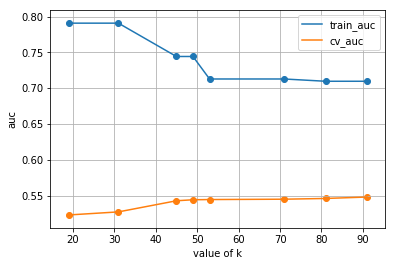

In [92]:
k=[19,31,45,49,53,71,81,91]
plt.plot(k,train_auc,label='train_auc')
plt.plot(k,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(k,train_auc)
plt.scatter(k,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of k')
plt.show()

In [62]:
bestK=91
clf=KNeighborsClassifier(n_neighbors=bestK)
clf.fit(train_n,y_train)
y_train_pred=[]
y_train_pred.extend(clf.predict_proba(train_n)[:,1])
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_pred)
y_test_pred=[]
y_test_pred.extend(clf.predict_proba(test_n)[:,1])
fpr_test,tpr_test,thresholds_test=roc_curve(y_test,y_test_pred)

Text(0,0.5,'True positive rate')

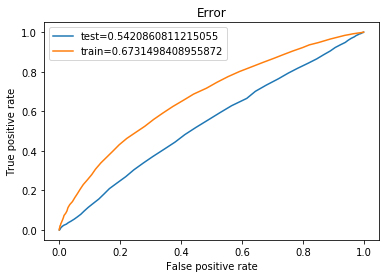

In [63]:
plt.title('Error')
plt.plot(fpr_test,tpr_test,label='test='+str(auc(fpr_test,tpr_test)))
plt.plot(fpr_train,tpr_train,label='train='+str(auc(fpr_train,tpr_train)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Train Confusion Matrix
the maximum value of tpr*(1-fpr) 0.39143788669392454 for threshold 0.495
[[12272  8480]
 [ 7125 13627]]
the maximum value of tpr*(1-fpr) 0.39143788669392454 for threshold 0.495


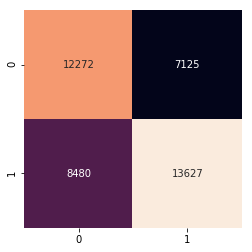

In [64]:
# Please write all the code with proper documentation
print('Train Confusion Matrix')
print(confusion_matrix(y_train,predict(y_train_pred,thresholds_train,fpr_train,tpr_train)))
tn,fp,fn,tp=confusion_matrix(y_train,predict(y_train_pred,thresholds_train,fpr_train,tpr_train)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True,fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

Test Confusion Matrix
the maximum value of tpr*(1-fpr) 0.39143788669392454 for threshold 0.495
[[1006 1314]
 [4710 7970]]
the maximum value of tpr*(1-fpr) 0.39143788669392454 for threshold 0.495


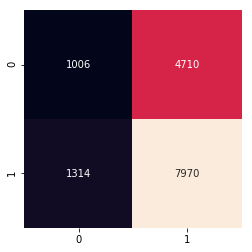

In [65]:
print('Test Confusion Matrix')
print(confusion_matrix(y_test,predict(y_test_pred,thresholds_train,fpr_train,tpr_train)))
tn,fp,fn,tp=confusion_matrix(y_test,predict(y_test_pred,thresholds_train,fpr_train,tpr_train)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [66]:
train_tfidfw2v=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
quantity_one_hot_train,wtw2v_train_essay,wtw2v_train_title)).tocsr()

cv_tfidfw2v=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
quantity_one_hot_cv,wtw2v_cv_essay,wtw2v_cv_title)).tocsr()

test_tfidfw2v=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
quantity_one_hot_test,wtw2v_test_essay,wtw2v_test_title)).tocsr()

print(test_tfidfw2v.shape)
print(train_tfidfw2v.shape)
print(cv_tfidfw2v.shape)

(15000, 701)
(41504, 701)
(10500, 701)


Text(0,0.5,'variance')

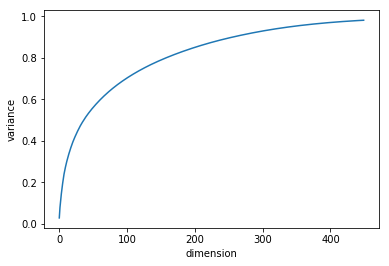

In [67]:
from sklearn.decomposition import TruncatedSVD
reducing_d=TruncatedSVD(450)
reducing_d.fit(train_tfidfw2v)
plt.plot(np.cumsum(reducing_d.explained_variance_ratio_))
plt.xlabel('dimension')
plt.ylabel('variance')

In [68]:
train_n=reducing_d.fit_transform(train_tfidfw2v)
cv_n=reducing_d.fit_transform(cv_tfidfw2v)
test_n = reducing_d.fit_transform(test_tfidfw2v)

In [103]:
# Please wrtrain_auc=[]
train_auc=[]
cv_auc=[]
k=[19,35,41,49,55,61,71,83,91]
for k in tqdm(k):
    model=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    model.fit(train_n,y_train)
    y_train_prob=[]
    for i in range(0,train_n.shape[0],1000):
        y_train_prob.extend(model.predict_proba(train_n[i:i+1000])[:,1])
    y_cv_prob=[]
    for i in range(0,cv_n.shape[0],1000):
        y_cv_prob.extend(model.predict_proba(cv_n[i:i+1000])[:,1])
    train_auc.append(roc_auc_score(y_train,y_train_prob))
    cv_auc.append(roc_auc_score(y_cv,y_cv_prob))









  0%|          | 0/9 [00:00<?, ?it/s]






 11%|█         | 1/9 [01:23<11:05, 83.19s/it]






 22%|██▏       | 2/9 [02:44<09:37, 82.49s/it]






 33%|███▎      | 3/9 [04:27<08:53, 88.92s/it]






 44%|████▍     | 4/9 [05:56<07:23, 88.67s/it]






 56%|█████▌    | 5/9 [07:31<06:02, 90.59s/it]






 67%|██████▋   | 6/9 [09:15<04:44, 94.76s/it]






 78%|███████▊  | 7/9 [10:46<03:07, 93.71s/it]






 89%|████████▉ | 8/9 [12:18<01:33, 93.16s/it]






100%|██████████| 9/9 [13:48<00:00, 92.04s/it]








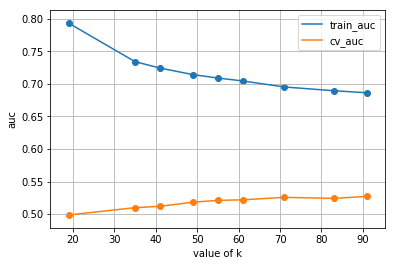

In [104]:
k=[19,35,41,49,55,61,71,83,91]
plt.plot(k,train_auc,label='train_auc')
plt.plot(k,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(k,train_auc)
plt.scatter(k,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of k')
plt.show()

In [69]:
bestK=61
clf=KNeighborsClassifier(n_neighbors=bestK,algorithm='brute')
clf.fit(train_n,y_train)
y_train_pred=[]
y_train_pred.extend(clf.predict_proba(train_n)[:,1])
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_pred)
y_test_pred=[]
y_test_pred.extend(clf.predict_proba(test_n)[:,1])
fpr_test,tpr_test,thresholds_test=roc_curve(y_test,y_test_pred)

Text(0,0.5,'True positive rate')

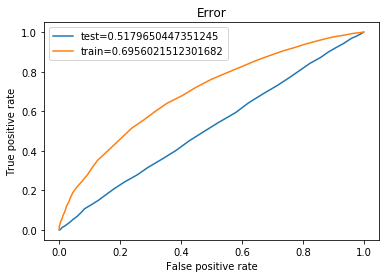

In [70]:
plt.title('Error')
plt.plot(fpr_test,tpr_test,label='test='+str(auc(fpr_test,tpr_test)))
plt.plot(fpr_train,tpr_train,label='train='+str(auc(fpr_train,tpr_train)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Train Confusion Matrix
the maximum value of tpr*(1-fpr) 0.41402676527188353 for threshold 0.475
[[12366  8386]
 [ 6650 14102]]
the maximum value of tpr*(1-fpr) 0.41402676527188353 for threshold 0.475


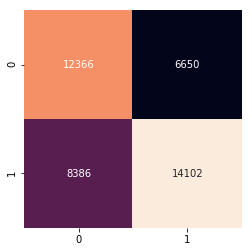

In [71]:
# Please write all the code with proper documentation
print('Train Confusion Matrix')
print(confusion_matrix(y_train,predict(y_train_pred,thresholds_train,fpr_train,tpr_train)))
tn,fp,fn,tp=confusion_matrix(y_train,predict(y_train_pred,thresholds_train,fpr_train,tpr_train)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True,fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

Test Confusion Matrix
the maximum value of tpr*(1-fpr) 0.41402676527188353 for threshold 0.475
[[ 976 1344]
 [5155 7525]]
the maximum value of tpr*(1-fpr) 0.41402676527188353 for threshold 0.475


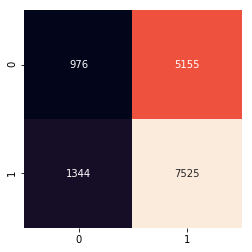

In [72]:
print('Test Confusion Matrix')
print(confusion_matrix(y_test,predict(y_test_pred,thresholds_train,fpr_train,tpr_train)))
tn,fp,fn,tp=confusion_matrix(y_test,predict(y_test_pred,thresholds_train,fpr_train,tpr_train)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [73]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
train_x=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,num_or_not_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
quantity_one_hot_train,bow_train_essay,bow_train_title,wtw2v_train_essay,wtw2v_train_title,avgw2v_train_essay,avgw2v_train_title,tfidf_train_essay,tfidf_train_title)).tocsr()
cv_x=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,num_or_not_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
quantity_one_hot_cv,bow_cv_essay,bow_cv_title,wtw2v_cv_essay,wtw2v_cv_title,avgw2v_cv_essay,avgw2v_cv_title,tfidf_cv_essay,tfidf_cv_title)).tocsr()
test_x=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,num_or_not_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
quantity_one_hot_test,bow_test_essay,bow_test_title,wtw2v_test_essay,wtw2v_test_title,avgw2v_test_essay,avgw2v_test_title,tfidf_test_essay,tfidf_test_title)).tocsr()
print(train_x.shape)  
print(cv_x.shape)
print(test_x.shape)

(41504, 27962)
(10500, 27962)
(15000, 27962)


In [74]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest,f_classif
train_new=SelectKBest(f_classif,k=2000).fit_transform(train_x,y_train)
cv_new=SelectKBest(f_classif,k=2000).fit_transform(cv_x,y_cv)
test_new=SelectKBest(f_classif,k=2000).fit_transform(test_x,y_test)

In [75]:
print(train_new.shape)
print(cv_new.shape)
print(test_new.shape)

(41504, 2000)
(10500, 2000)
(15000, 2000)


In [65]:
train_auc=[]
cv_auc=[]
from tqdm import tqdm
K=[11,25,39,41,57,61,77,87,93]
for k in tqdm(K):
    model=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    model.fit(train_new,y_train)
    y_train_prob=[]
    for i in range(0,train_new.shape[0],1000):
        y_train_prob.extend(model.predict_proba(train_new[i:i+1000])[:,1])
    y_cv_prob=[]
    for i in range(0,cv_new.shape[0],1000):
        y_cv_prob.extend(model.predict_proba(cv_new[i:i+1000])[:,1])
    train_auc.append(roc_auc_score(y_train,y_train_prob))
    cv_auc.append(roc_auc_score(y_cv,y_cv_prob))

100%|██████████| 9/9 [5:10:41<00:00, 1852.81s/it]  


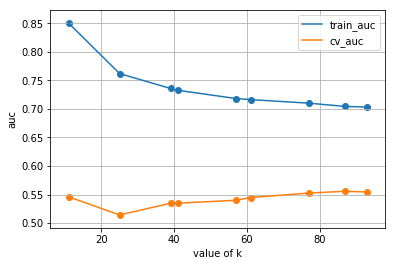

In [66]:
k=[11,25,39,41,57,61,77,87,93]
plt.plot(k,train_auc,label='train_auc')
plt.plot(k,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(k,train_auc)
plt.scatter(k,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of k')
plt.show()

In [76]:
bestK=77
clf=KNeighborsClassifier(n_neighbors=bestK,algorithm='brute')
clf.fit(train_new,y_train)
y_train_pred=[]
y_train_pred.extend(clf.predict_proba(train_new)[:,1])
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_pred)
y_test_pred=[]
y_test_pred.extend(clf.predict_proba(test_new)[:,1])
fpr_test,tpr_test,thresholds_test=roc_curve(y_test,y_test_pred)

Text(0,0.5,'True positive rate')

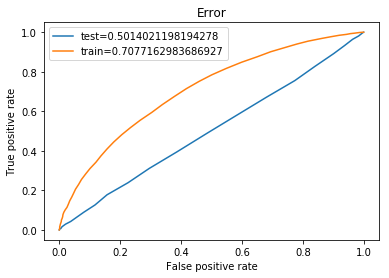

In [77]:
plt.title('Error')
plt.plot(fpr_test,tpr_test,label='test='+str(auc(fpr_test,tpr_test)))
plt.plot(fpr_train,tpr_train,label='train='+str(auc(fpr_train,tpr_train)))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Train Confusion Matrix
the maximum value of tpr*(1-fpr) 0.4198249472494203 for threshold 0.364
[[13722  7030]
 [ 7590 13162]]
the maximum value of tpr*(1-fpr) 0.4198249472494203 for threshold 0.364


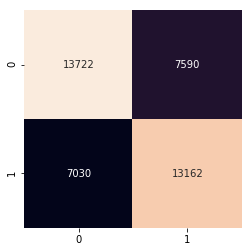

In [78]:
# Please write all the code with proper documentation
print('Train Confusion Matrix')
print(confusion_matrix(y_train,predict(y_train_pred,thresholds_train,fpr_train,tpr_train)))
tn,fp,fn,tp=confusion_matrix(y_train,predict(y_train_pred,thresholds_train,fpr_train,tpr_train)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True,fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

Test Confusion Matrix
the maximum value of tpr*(1-fpr) 0.4198249472494203 for threshold 0.364
[[ 2133   187]
 [11544  1136]]
the maximum value of tpr*(1-fpr) 0.4198249472494203 for threshold 0.364


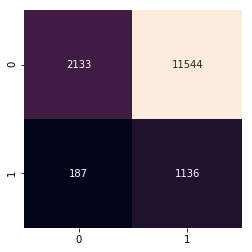

In [79]:
print('Test Confusion Matrix')
print(confusion_matrix(y_test,predict(y_test_pred,thresholds_train,fpr_train,tpr_train)))
tn,fp,fn,tp=confusion_matrix(y_test,predict(y_test_pred,thresholds_train,fpr_train,tpr_train)).ravel()
mat=np.matrix([[tn,fn],[fp,tp]])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,            
xticklabels=[0,1], yticklabels=[0,1]) 

<h1>3. Conclusions</h1>

In [80]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=['set','hyperparameter','score']
table.add_row(['BOW','71','0.58'])
table.add_row(['TFIDF','91','0.54'])
table.add_row(['AVGW2V','91','0.54'])
table.add_row(['TFIDFW2V','61','0.51'])
table.add_row(['SELECTKBEST','77','0.50'])

In [81]:
print(table)

+-------------+----------------+-------+
|     set     | hyperparameter | score |
+-------------+----------------+-------+
|     BOW     |       71       |  0.58 |
|    TFIDF    |       91       |  0.54 |
|    AVGW2V   |       91       |  0.54 |
|   TFIDFW2V  |       61       |  0.51 |
| SELECTKBEST |       77       |  0.50 |
+-------------+----------------+-------+
